In [1]:
from Evolution import *
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# reinitialisation of base chromosome class, specifying crossover and mutation function 
class MyChromosome(BaseChromosome):
    def __init__(self):
        super().__init__()

    def crossover(self, other):
        new = MyChromosome()
        self.copy(new)

        new['network_architecure'] = self._network_architecure.crossover(other._network_architecure)

        new['lr'] = (self['lr'] + other['lr']) / 2

        return new

    def mutate(self, rate=0.3):
        new = MyChromosome()
        self.copy(new)

        if random.random() < rate:
            new.lr = new._lr.get()
        else:
            new.lr = self.lr

        if random.random() < rate:
            new.network_architecure = new._network_architecure.mutate()
        else:
            new.network_architecure = self.network_architecure
        return new

In [54]:
# fit function, depends only on chromosome 
def evaluate(chromosome: MyChromosome):
    return sum(chromosome.network_architecure) / ((chromosome.lr - 5) ** 2 + len(chromosome.network_architecure))

In [55]:
# object that produces new chromosomes, by specified parameters
chromosome_factory = ChromosomeClassFactory(
        network_architecure={'n': list(range(2, 10)), 'range': (5, 40)},
        lr=(1, 10)
    )

In [56]:
# evolution hyperparameters initialisation 
POPULATION_SIZE = 120
ITERATIONS = 100
best = [None, -float('inf')]

In [52]:
# need for statistic collection 
statistic_best = []
statistic_mean = []
statistic_genome_size = []
statistic_lr = []
statistic_sum = []

# Evolutionary algorithm 

# initial population initialisation 
population = []
for _ in range(POPULATION_SIZE):
    c = chromosome_factory.generate(MyChromosome)
    population.append([c, None])

# evolution process 
for _ in tqdm(range(ITERATIONS)):
    # scoring each chromosome 
    for instance in population:
        if instance[1] is None:
            instance[1] = evaluate(instance[0])

    # selection of best instances 
    population = sorted(population, key=lambda x: x[1], reverse=True)[:POPULATION_SIZE // 3]

    statistic_best.append(population[0][1])
    statistic_mean.append(sum(map(lambda x: x[1], population)) / POPULATION_SIZE)
    statistic_sum.append(sum(population[0][0].network_architecure))
    statistic_lr.append(population[0][0].lr)
    statistic_genome_size.append(len(population[0][0].network_architecure))

    # checking for the best solution 
    if population[0][1] > best[1]:
        best = population[0]

    # filling the population with new genes 
    while len(population) < POPULATION_SIZE:
        r = random.random()
        if r < 0.33:
            population.append([random.choice(population)[0].crossover(random.choice(population)[0]), None])
        elif 0.33 <= r < 0.66:
            population.append([random.choice(population)[0].mutate(), None])
        else:
            population.append([chromosome_factory.generate(MyChromosome), None])

 49%|███████████████████████████████████████▏                                        | 49/100 [00:00<00:00, 334.23it/s]


ZeroDivisionError: float division by zero

In [47]:
print(best[0], f'{best[1]:_}', sep='\n')

--Chromosome--
network_architecure: (39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089, 39.78668662003089)
lr: 1.0659214066695202

335.9348797573193


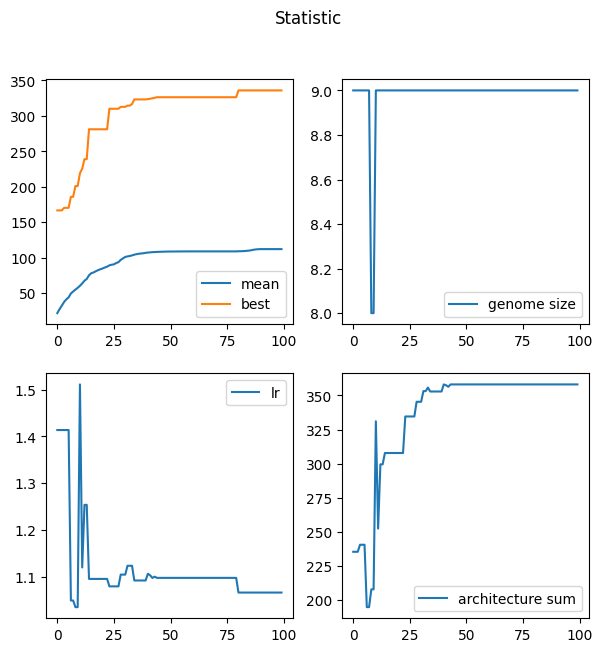

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
fig.suptitle('Statistic')

plt.subplot(2, 2, 1)
plt.plot(statistic_mean, label='mean')
plt.plot(statistic_best, label='best')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(statistic_genome_size, label='genome size')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(statistic_lr, label='lr')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(statistic_sum, label='architecture sum')
plt.legend()

plt.show()